# logistic 二分类

## 导入库

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

## 导入数据

In [2]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open(r'数据\testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

## sigmoid 函数

In [3]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

## 梯度下降: 每一次调参都用到所有的数据

In [4]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights

In [5]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr,labelMat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [6]:
## 分析数据：画出决策边界

In [7]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y.transpose())
    plt.xlabel('X1');plt.ylabel('X2');
    plt.show()

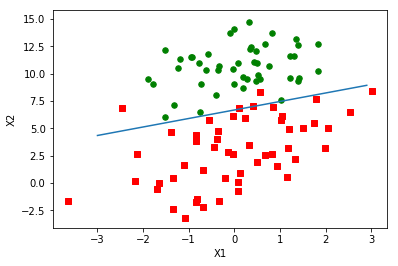

In [8]:
plotBestFit(weights)

In [9]:
## 随机梯度下降：

In [12]:
def stocGradAscent0(dataMatrix,classLabels,numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1+j+i)+ 0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i]-h
            weights = weights + alpha*error*dataMatrix[i]
            del (dataIndex[randIndex])
    return weights      

[15.54740137  1.23272371 -2.18652802]


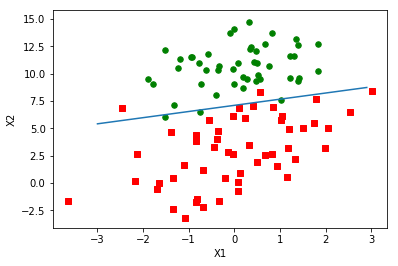

In [13]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr),labelMat,150)
print(weights)
plotBestFit(weights)

# logistic 从疝气病症预测病马的死亡率

### 解析文件
缺失值处理方法：
（1）使用可用特征的均值填补缺失值
（2）使用特殊值来填补，如-1
（3）忽略含有缺失值的样本
（4）使用其他的机器学习方法来预测

In [17]:
## 分类函数定义

In [18]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob>0.5:
        return 1.0
    else:
        return 0.0

In [26]:
def colicTest():
    frTrain = open(r'数据/horseColicTraining.txt')
    frTest = open(r'数据/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent0(array(trainingSet),trainingLabels,500)
    
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec +=1
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        
        if int(classifyVector(array(lineArr),trainWeights))!=int(currLine[21]):
            errorCount += 1
        
    errorRate = (float(errorCount)/numTestVec)
    print('the test error rate is {}'.format(errorRate))
    return errorRate

## 多次测试取平均 
因为有随机的成分存在，所以colicRest() 结果可能有所不同，若梯度下降中完全收敛则结果确定 
调用 colicTest() 10次 并求结果的平均值


In [29]:
def multiTest():
    numTest = 10;errorSum = 0.0
    for k in range(numTest):
        errorSum += colicTest()
    print('After %d iterations the average error rate is: %f' % (numTest, errorSum/float(numTest)))

In [30]:
multiTest()

the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
the test error rate is 0.3283582089552239
After 10 iterations the average error rate is: 0.328358
